In [1]:
import matplotlib.pyplot as plt

import math

import numpy as np

import pandas as pd

import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

import scipy.stats as sc

import matplotlib.gridspec as gridspec


In [2]:
weather_sf = pd.read_csv('2176372.csv', header='infer')

In [3]:
weather_sf.head()

,STATION,DATE,REPORT_TYPE,SOURCE,AWND,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,...,ShortDurationPrecipitationValue060,ShortDurationPrecipitationValue080,ShortDurationPrecipitationValue100,ShortDurationPrecipitationValue120,ShortDurationPrecipitationValue150,ShortDurationPrecipitationValue180,Sunrise,Sunset,TStorms,WindEquipmentChangeDate
0,99999923272,2013-08-25T23:59:00,SOD,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,534.0,1849.0,NaN,NaN
1,99999923272,2013-08-26T23:59:00,SOD,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,535.0,1848.0,NaN,NaN
2,99999923272,2013-08-27T23:59:00,SOD,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,535.0,1846.0,NaN,NaN
3,99999923272,2013-08-28T23:59:00,SOD,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,536.0,1845.0,NaN,NaN
4,99999923272,2013-08-29T23:59:00,SOD,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,537.0,1844.0,NaN,NaN


In [4]:
# check for duplicates on DATE

weather_sf['DATE_'] =pd.to_datetime(weather_sf['DATE'])
weather_sf['DATE_']=weather_sf['DATE_'].dt.strftime("%Y/%m/%d")

weather_sf.duplicated(subset='DATE_').value_counts()

False    735
True     551
dtype: int64

In [5]:
list(weather_sf.columns)

['STATION',
 'DATE',
 'REPORT_TYPE',
 'SOURCE',
 'AWND',
 'BackupDirection',
 'BackupDistance',
 'BackupDistanceUnit',
 'BackupElements',
 'BackupElevation',
 'BackupElevationUnit',
 'BackupEquipment',
 'BackupLatitude',
 'BackupLongitude',
 'BackupName',
 'CDSD',
 'CLDD',
 'DSNW',
 'DailyAverageDewPointTemperature',
 'DailyAverageDryBulbTemperature',
 'DailyAverageRelativeHumidity',
 'DailyAverageSeaLevelPressure',
 'DailyAverageStationPressure',
 'DailyAverageWetBulbTemperature',
 'DailyAverageWindSpeed',
 'DailyCoolingDegreeDays',
 'DailyDepartureFromNormalAverageTemperature',
 'DailyHeatingDegreeDays',
 'DailyMaximumDryBulbTemperature',
 'DailyMinimumDryBulbTemperature',
 'DailyPeakWindDirection',
 'DailyPeakWindSpeed',
 'DailyPrecipitation',
 'DailySnowDepth',
 'DailySnowfall',
 'DailySustainedWindDirection',
 'DailySustainedWindSpeed',
 'DailyWeather',
 'HDSD',
 'HTDD',
 'HeavyFog',
 'HourlyAltimeterSetting',
 'HourlyDewPointTemperature',
 'HourlyDryBulbTemperature',
 'HourlyPrec

In [6]:
 weather=weather_sf[['DailyDepartureFromNormalAverageTemperature', 'DailyPrecipitation','STATION','DATE','DailyAverageDewPointTemperature',
 'DailyAverageDryBulbTemperature', 'DailyAverageWindSpeed','Sunrise','Sunset','TStorms','DATE_']].copy()


In [7]:
weather.head()

,DailyDepartureFromNormalAverageTemperature,DailyPrecipitation,STATION,DATE,DailyAverageDewPointTemperature,DailyAverageDryBulbTemperature,DailyAverageWindSpeed,Sunrise,Sunset,TStorms,DATE_
0,2.9,0.0,99999923272,2013-08-25T23:59:00,NaN,65.0,NaN,534.0,1849.0,NaN,2013/08/25
1,-0.2,0.0,99999923272,2013-08-26T23:59:00,NaN,62.0,NaN,535.0,1848.0,NaN,2013/08/26
2,-0.2,0.0,99999923272,2013-08-27T23:59:00,NaN,62.0,NaN,535.0,1846.0,NaN,2013/08/27
3,0.7,0.0,99999923272,2013-08-28T23:59:00,NaN,63.0,NaN,536.0,1845.0,NaN,2013/08/28
4,2.7,0.0,99999923272,2013-08-29T23:59:00,NaN,65.0,NaN,537.0,1844.0,NaN,2013/08/29


In [8]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286 entries, 0 to 1285
Data columns (total 11 columns):
DailyDepartureFromNormalAverageTemperature    735 non-null float64
DailyPrecipitation                            735 non-null float64
STATION                                       1286 non-null int64
DATE                                          1286 non-null object
DailyAverageDewPointTemperature               0 non-null float64
DailyAverageDryBulbTemperature                735 non-null float64
DailyAverageWindSpeed                         0 non-null float64
Sunrise                                       735 non-null float64
Sunset                                        735 non-null float64
TStorms                                       0 non-null float64
DATE_                                         1286 non-null object
dtypes: float64(8), int64(1), object(2)
memory usage: 110.6+ KB


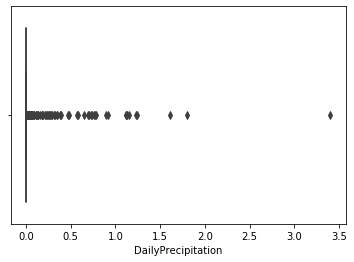

In [9]:
weather['DailyPrecipitation'].median()

sns.boxplot(weather['DailyPrecipitation'])

In [10]:
weather.drop_duplicates(subset='DATE_',keep='last', inplace=True)

weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735 entries, 0 to 1285
Data columns (total 11 columns):
DailyDepartureFromNormalAverageTemperature    712 non-null float64
DailyPrecipitation                            712 non-null float64
STATION                                       735 non-null int64
DATE                                          735 non-null object
DailyAverageDewPointTemperature               0 non-null float64
DailyAverageDryBulbTemperature                712 non-null float64
DailyAverageWindSpeed                         0 non-null float64
Sunrise                                       712 non-null float64
Sunset                                        712 non-null float64
TStorms                                       0 non-null float64
DATE_                                         735 non-null object
dtypes: float64(8), int64(1), object(2)
memory usage: 68.9+ KB


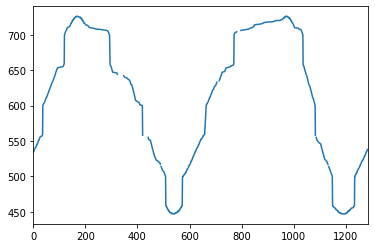

In [11]:
weather['Sunrise'].plot(kind='line')

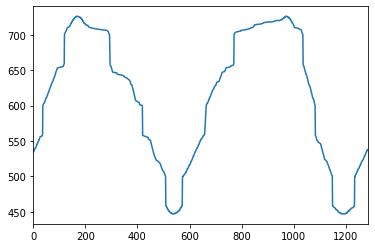

In [12]:
weather['Sunrise'].interpolate(method='linear').plot(kind='line')

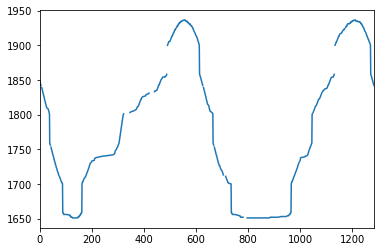

In [13]:
weather['Sunset'].plot(kind='line')

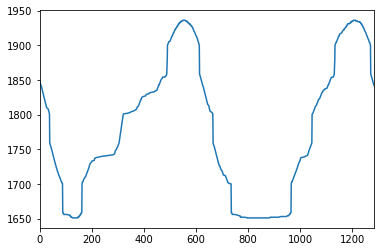

In [14]:
weather['Sunset'].interpolate(method='linear').plot(kind='line')

0.03922752808988764

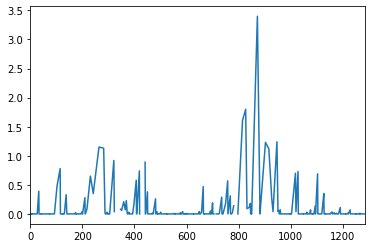

In [15]:
weather['DailyPrecipitation'].plot(kind='line')

weather['DailyPrecipitation'].mean()

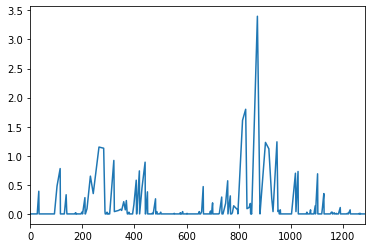

In [16]:
weather['DailyPrecipitation'].interpolate(method='linear').plot(kind='line')

In [18]:
#weather['DailyPrecipitation'].interpolate(method='polynomial', order=2).plot(kind='line')

In [19]:
#weather['DailyPrecipitation'].fillna(method='bfill').plot(kind='line')

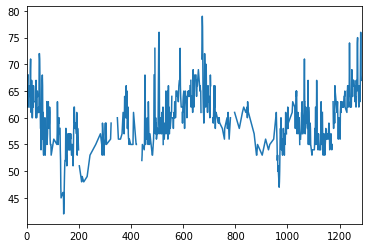

In [17]:
weather['DailyAverageDryBulbTemperature'].plot(kind='line')

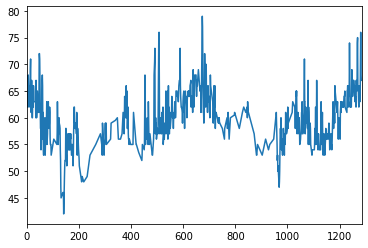

In [18]:
weather['DailyAverageDryBulbTemperature'].interpolate(method='linear').plot(kind='line')

In [19]:
### need to define the dataframe first

weather_SF = weather

In [20]:
## Variables to consider

weather_SF['DailyAverageDryBulbTemperature']=weather['DailyAverageDryBulbTemperature'].interpolate(method='linear')
weather_SF['DailyPrecipitation']=weather['DailyPrecipitation'].interpolate(method='linear')
weather_SF['Sunrise']=weather['Sunrise'].interpolate(method='linear')
weather_SF['Sunset']=weather['Sunset'].interpolate(method='linear')

In [21]:
weather_SF= weather_SF[['DATE','DailyAverageDryBulbTemperature','DailyPrecipitation','Sunrise','Sunset']].copy()

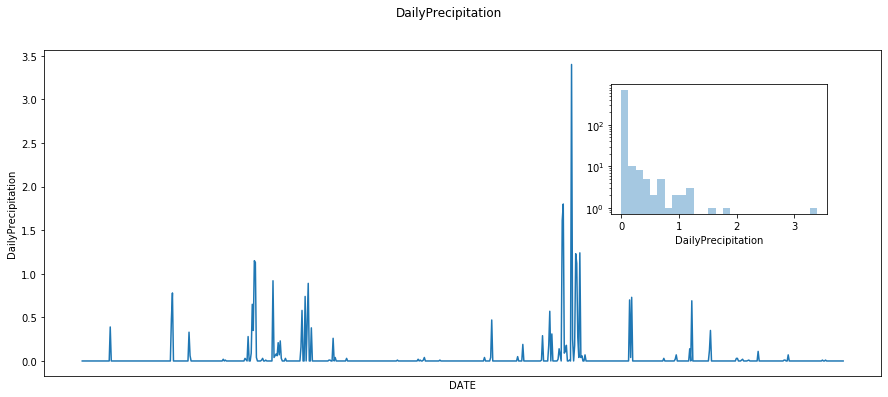

In [22]:
fig = plt.figure(figsize=[15,6])

ax=sns.lineplot(x='DATE', y='DailyPrecipitation', data=weather_SF)
ax.set_xticks(())


ax2=fig.add_axes([0.65,0.50,0.20,0.3])
#sns.boxplot(weather_SF['DailyPrecipitation'])
sns.distplot(weather_SF['DailyPrecipitation'],kde=False)
ax2.set_yscale('log')
plt.suptitle('DailyPrecipitation')
plt.show()

#sns.boxplot(weather_SF['DailyPrecipitation'], ax=ax[0,0])
#sns.lineplot(x='DATE', y='DailyPrecipitation', data=weather_SF, ax=ax[0])
#sns.boxplot(weather_SF['DailyAverageDryBulbTemperature'], ax=ax[1])
#sns.lineplot(x='DATE',y='DailyAverageDryBulbTemperature', data=weather_SF, ax=ax[1])
#ax[0,0].set_xlabel('Daily Precipitation')




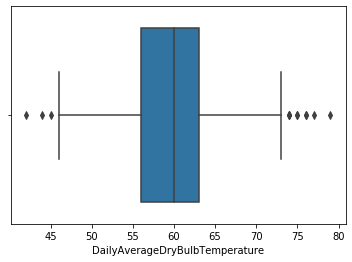

In [23]:
sns.boxplot(weather_SF['DailyAverageDryBulbTemperature'])

[]

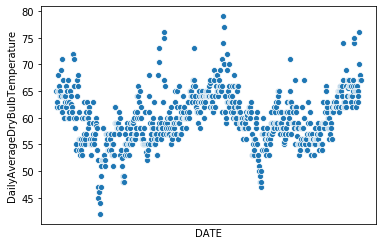

In [24]:
ax=sns.scatterplot(x='DATE',y='DailyAverageDryBulbTemperature', data=weather_SF)
ax.set_xticks(())

In [25]:
weather_SF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735 entries, 0 to 1285
Data columns (total 5 columns):
DATE                              735 non-null object
DailyAverageDryBulbTemperature    735 non-null float64
DailyPrecipitation                735 non-null float64
Sunrise                           735 non-null float64
Sunset                            735 non-null float64
dtypes: float64(4), object(1)
memory usage: 34.5+ KB


In [26]:
weather_SF['DATE']=pd.to_datetime(weather_SF['DATE']).dt.strftime("%Y/%m/%d")

In [27]:
trips_data = pd.read_csv('trip.csv', header='infer')
station_data = pd.read_csv('station.csv', header='infer')

In [28]:
station_data.head(1)

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013


In [29]:
trips_data.head(1)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127


In [30]:
merged= pd.merge(station_data, trips_data, left_on='id', right_on='start_station_id', how='inner')

In [31]:
merged.head(1)

,id_x,name,lat,long,dock_count,city,installation_date,id_y,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013,4958,454,8/29/2013 19:18,San Jose Diridon Caltrain Station,2,8/29/2013 19:25,Paseo de San Antonio,7,91,Subscriber,95126


In [32]:
### Generate two separate series, for weekend and weekday

merged['start_date'] = pd.to_datetime(merged['start_date'])

merged = merged[['city','start_date', 'subscription_type']].copy()

merged['day_week'] = merged['start_date'].dt.weekday

merged['start_date'] = merged['start_date'].dt.strftime("%Y/%m/%d")

## WEEKDAY

merged_WD=merged[merged['day_week'].isin([0,1,2,3,4])]

## WEEKEND

merged_WE=merged[merged['day_week'].isin([5,6])]


In [33]:
merged_WD_SF = merged_WD[merged_WD['city']== 'San Francisco']


In [34]:
merged_WD_SF.head(1) # weekday for san francisco

,city,start_date,subscription_type,day_week
63300,San Francisco,2013/08/29,Subscriber,3


In [35]:
merged_WD_SF_grouped = merged_WD_SF.groupby(by=['start_date']).agg({'subscription_type':'value_counts'})

In [36]:
merged_WD_SF_grouped.head(1) # number of started trips per day in San Francisco

,,subscription_type
start_date,subscription_type,
2013/08/29,Subscriber,383


In [37]:
merged_WD_SF_grouped.rename(columns={'subscription_type':'Number of Trips'},inplace=True)

merged_WD_SF_grouped.reset_index(inplace=True)

merged_WD_SF_grouped.head(2)

,start_date,subscription_type,Number of Trips
0,2013/08/29,Subscriber,383
1,2013/08/29,Customer,259


In [38]:
weather_trips_WD_SF = pd.merge(merged_WD_SF_grouped, weather_SF, left_on='start_date', right_on='DATE', how='inner')

In [39]:
weather_trips_WD_SF.drop(columns=['Sunrise','Sunset'],inplace=True)

In [40]:
weather_trips_WD_SF.drop(columns=['start_date','DATE'],inplace=True)

In [41]:
weather_trips_WD_SF.head(2)

,subscription_type,Number of Trips,DailyAverageDryBulbTemperature,DailyPrecipitation
0,Subscriber,383,65.0,0.0
1,Customer,259,65.0,0.0


<Figure size 1080x432 with 0 Axes>

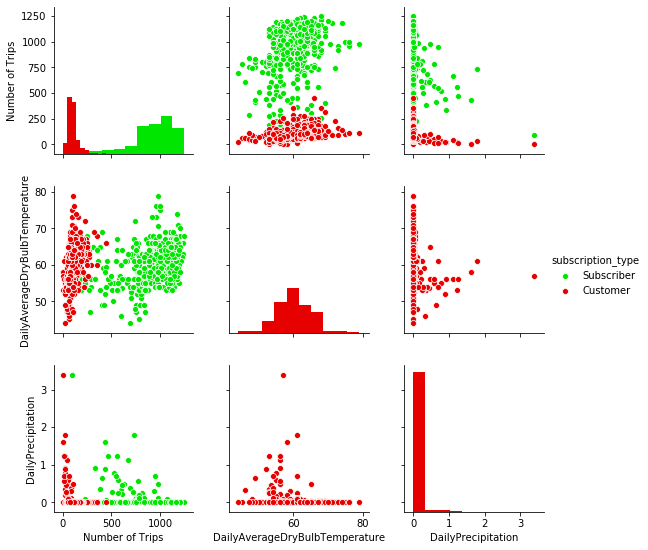

In [56]:

## plot for san francisco weekday
plt.figure(figsize=[15,6])
ax=sns.pairplot(weather_trips_WD_SF,hue='subscription_type', diag_kind='hist',palette={'Customer':(0.9, 0.0, 0.0), 'Subscriber':(0.0, 0.9, 0.0)})


plt.savefig('weather_impact_week.png')
plt.show()

In [58]:
## Build pairgrid for WE SERIES 


merged_WE_SF = merged_WE[merged_WE['city']== 'San Francisco']

merged_WE_SF_grouped = merged_WE_SF.groupby(by=['start_date']).agg({'subscription_type':'value_counts'})

merged_WE_SF_grouped.rename(columns={'subscription_type':'Number of Trips'},inplace=True)

merged_WE_SF_grouped.reset_index(inplace=True)

merged_WE_SF_grouped.head(2)

weather_trips_WE_SF = pd.merge(merged_WE_SF_grouped, weather_SF, left_on='start_date', right_on='DATE', how='inner')

weather_trips_WE_SF.drop(columns=['Sunrise','Sunset'],inplace=True)

weather_trips_WE_SF.drop(columns=['start_date','DATE'],inplace=True)

In [59]:
weather_trips_WD_SF.head(2)

,subscription_type,Number of Trips,DailyAverageDryBulbTemperature,DailyPrecipitation
0,Subscriber,383,65.0,0.0
1,Customer,259,65.0,0.0


<Figure size 1080x432 with 0 Axes>

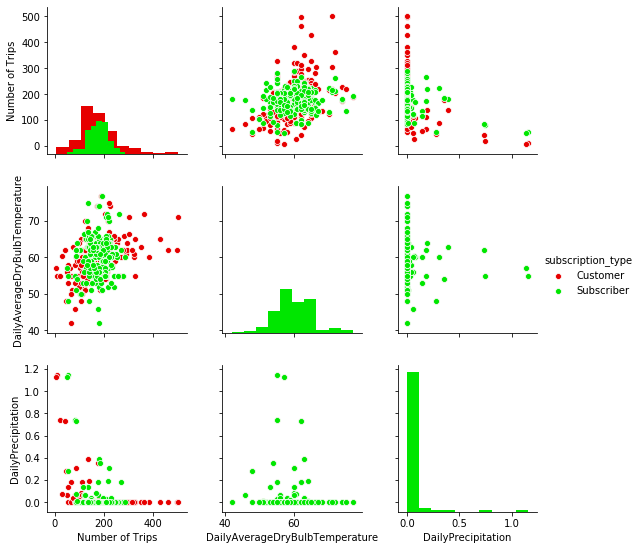

<Figure size 432x288 with 0 Axes>

In [62]:
## WEEKEND SERIES

## plot for san francisco weekend

plt.figure(figsize=[15,6])
sns.pairplot(weather_trips_WE_SF,hue='subscription_type', diag_kind='hist', palette={'Customer':(0.9, 0.0, 0.0), 'Subscriber':(0.0, 0.9, 0.0)})

plt.show()
plt.savefig('weather_impact_weekend.png')

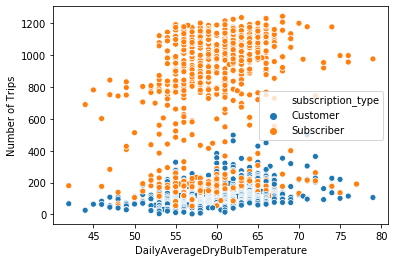

In [173]:
sns.scatterplot(x='DailyAverageDryBulbTemperature',y='Number of Trips',hue='subscription_type',data=weather_trips)

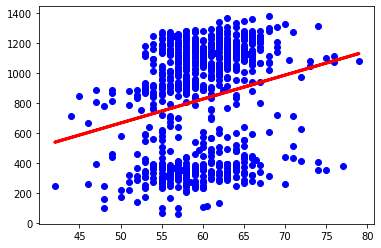

In [81]:
#### Linear regression???

X = weather_trips['DailyAverageDryBulbTemperature']
y = weather_trips['Number of Trips']

X = np.array(X)
y =np.array(y)

X=X.reshape(-1,1)
y=y.reshape(-1,1)

reg1 = LinearRegression().fit(X, y)

dataset_y_pred = reg1.predict(X)

# Plot outputs
plt.scatter(X,y,  color='blue')
plt.plot(X, dataset_y_pred, color='red', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()

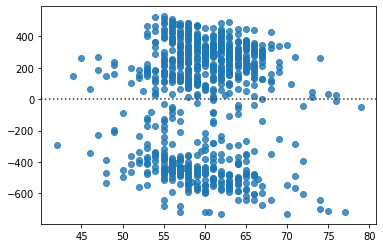

In [82]:
sns.residplot(X,y)

In [83]:
print('Coefficient of determination: %.2f'
      % r2_score(y, dataset_y_pred)) ## temperature vs daily trips

Coefficient of determination: 0.05


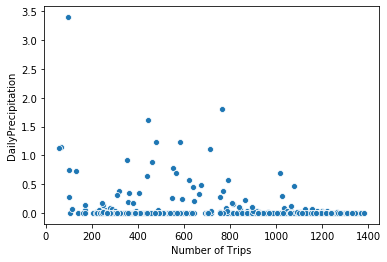

In [84]:
sns.scatterplot(x='Number of Trips',y='DailyPrecipitation',data=weather_trips)

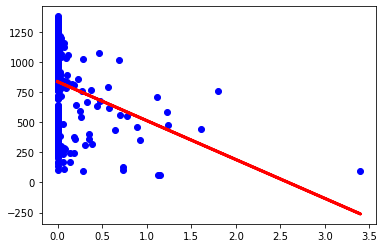

In [85]:
X = weather_trips['DailyPrecipitation']
y = weather_trips['Number of Trips']

X = np.array(X)
y =np.array(y)

X=X.reshape(-1,1)
y=y.reshape(-1,1)

reg1 = LinearRegression().fit(X, y)

dataset_y_pred = reg1.predict(X)

# Plot outputs
plt.scatter(X,y,  color='blue')
plt.plot(X, dataset_y_pred, color='red', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()

In [86]:
print('Coefficient of determination: %.2f'
      % r2_score(y, dataset_y_pred))

Coefficient of determination: 0.03


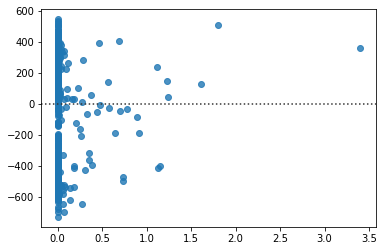

In [87]:
sns.residplot(X,y)

In [88]:
X = weather_trips['DailyPrecipitation']
y = weather_trips['Number of Trips']

X = np.array(X)
y =np.array(y)

In [89]:
sc.pearsonr(X,y)

(-0.1798806707220303, 9.825803033103062e-07)

In [304]:
## SUNSET

## Inspect number of trips per hour throughout the year

trips_data.head(1)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127


In [323]:
# Diciembre 2013, customer vs Subscriber, weekday vs weekend

trips_data['start_date'] = pd.to_datetime(trips_data['start_date'])

trips_data['day_week']=trips_data['start_date'].dt.weekday

trips_data['year']=trips_data['start_date'].dt.year
trips_data['month']=trips_data['start_date'].dt.month
trips_data['day']=trips_data['start_date'].dt.day
trips_data['hour']=trips_data['start_date'].dt.hour

# select december 2013 trips

trips_data_dec2013 = trips_data[(trips_data['year']==2013) & (trips_data['month']==12)]

# select june 2014 trips

trips_data_jun2014 = trips_data[(trips_data['year']==2014) & (trips_data['month']==6)]

## SERIES FOR WEEKDAY

## DECEMBER 2013

## SERIES FOR WEEKDAY

trips_data_dec2013_WD = trips_data_dec2013[trips_data_dec2013['day_week'].isin([0,1,2,3,4])]

trips_data_dec2013_WD = trips_data_dec2013_WD[['hour','subscription_type']].copy()

trips_data_dec2013_WD_hourG = trips_data_dec2013_WD.groupby(by=['hour']).agg({'subscription_type':'value_counts'})

trips_data_dec2013_WD_hourG.rename(columns={'subscription_type':'Number of Trips per Hour'}, inplace=True)

trips_data_dec2013_WD_hourG.reset_index(inplace=True)

## SERIES FOR WEEKEND

trips_data_dec2013_WE = trips_data_dec2013[trips_data_dec2013['day_week'].isin([5,6])]

trips_data_dec2013_WE = trips_data_dec2013_WE[['hour','subscription_type']].copy()

trips_data_dec2013_WE_hourG = trips_data_dec2013_WE.groupby(by=['hour']).agg({'subscription_type':'value_counts'})

trips_data_dec2013_WE_hourG.rename(columns={'subscription_type':'Number of Trips per Hour'}, inplace=True)

trips_data_dec2013_WE_hourG.reset_index(inplace=True)


In [320]:
trips_data_dec2013_WD_hourG.head(3)

,hour,subscription_type,Number of Trips per Hour
0,0,Subscriber,25
1,0,Customer,17
2,1,Customer,32


In [354]:
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

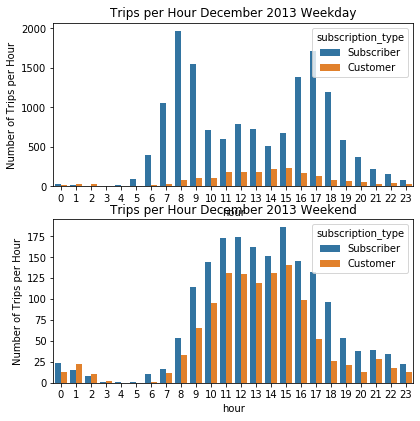

In [351]:
## PLOT FOR WEEKDAY and WEEKEND DECEMBER 2013

fig, ax = plt.subplots(2,1, sharey=False, figsize=[15,6])

sns.barplot(x='hour', y='Number of Trips per Hour', hue='subscription_type',data=trips_data_dec2013_WD_hourG, ax=ax[0])
ax[0].set_title('Trips per Hour December 2013 Weekday')

sns.barplot(x='hour', y='Number of Trips per Hour', hue='subscription_type',data=trips_data_dec2013_WE_hourG, ax=ax[1])

ax[1].set_title('Trips per Hour December 2013 Weekend')


#plt.yscale('log')
plt.show()


Text(0.5, 1.0, 'gs[-1, -2]')

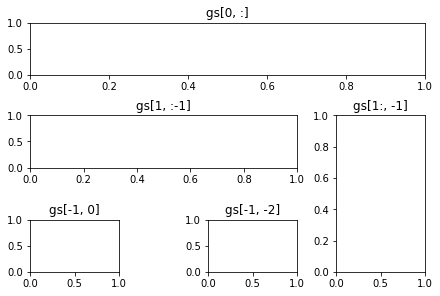

In [357]:
fig3 = plt.figure(constrained_layout=True)
gs = fig3.add_gridspec(4, 4)
f3_ax1 = fig3.add_subplot(gs[0, :])
f3_ax1.set_title('gs[0, :]')
f3_ax2 = fig3.add_subplot(gs[1, :-1])
f3_ax2.set_title('gs[1, :-1]')
f3_ax3 = fig3.add_subplot(gs[1:, -1])
f3_ax3.set_title('gs[1:, -1]')
f3_ax4 = fig3.add_subplot(gs[-1, 0])
f3_ax4.set_title('gs[-1, 0]')
f3_ax5 = fig3.add_subplot(gs[-1, -2])
f3_ax5.set_title('gs[-1, -2]')


In [331]:
## JUNE 2014

## SERIES FOR WEEKDAY

trips_data_jun2014_WD = trips_data_jun2014[trips_data_jun2014['day_week'].isin([0,1,2,3,4])]

trips_data_jun2014_WD = trips_data_jun2014_WD[['hour','subscription_type']].copy()

trips_data_jun2014_WD_hourG = trips_data_jun2014_WD.groupby(by=['hour']).agg({'subscription_type':'value_counts'})

trips_data_jun2014_WD_hourG.rename(columns={'subscription_type':'Number of Trips per Hour'}, inplace=True)

trips_data_jun2014_WD_hourG.reset_index(inplace=True)

## SERIES FOR WEEKEND

trips_data_jun2014_WE = trips_data_jun2014[trips_data_jun2014['day_week'].isin([5,6])]

trips_data_jun2014_WE = trips_data_jun2014_WE[['hour','subscription_type']].copy()

trips_data_jun2014_WE_hourG = trips_data_jun2014_WE.groupby(by=['hour']).agg({'subscription_type':'value_counts'})

trips_data_jun2014_WE_hourG.rename(columns={'subscription_type':'Number of Trips per Hour'}, inplace=True)

trips_data_jun2014_WE_hourG.reset_index(inplace=True)


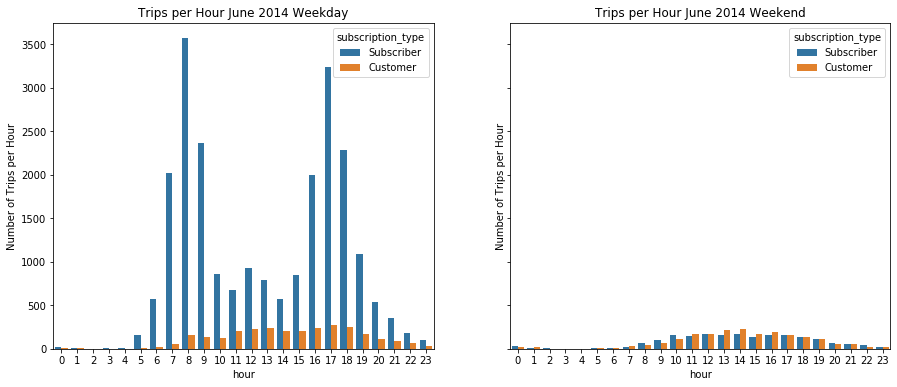

In [333]:
## PLOT FOR WEEKDAY and WEEKEND june 2014

fig, ax = plt.subplots(1,2, sharey=True, figsize=[15,6])

sns.barplot(x='hour', y='Number of Trips per Hour', hue='subscription_type',data=trips_data_jun2014_WD_hourG, ax=ax[0])
sns.barplot(x='hour', y='Number of Trips per Hour', hue='subscription_type',data=trips_data_jun2014_WE_hourG, ax=ax[1])
ax[0].set_title('Trips per Hour June 2014 Weekday')
ax[1].set_title('Trips per Hour June 2014 Weekend')
plt.show()

In [ ]:
/.